In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score as r2_score
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import math
import ribopy
from utils import *
%matplotlib inline

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.1
Creation Time     : 2023-08-02 22:57:26
Reference         : nondeduped_profile
Min Read Length   : 21
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name           Reads  Coverage  RNA-Seq  Metadata
GSM4798525   9062860         *                   
GSM4798526  18963692         *                   
GSM4798527  12337701         *                   

------------------------------------------------------------

Second Ribo File:

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.1
Creation Time     : 2023-08-30 19:08:23
Reference         : deduped_profile
Min Read Length   : 21
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Library:
-------- 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM4798525  5520737         *                   

----------------------

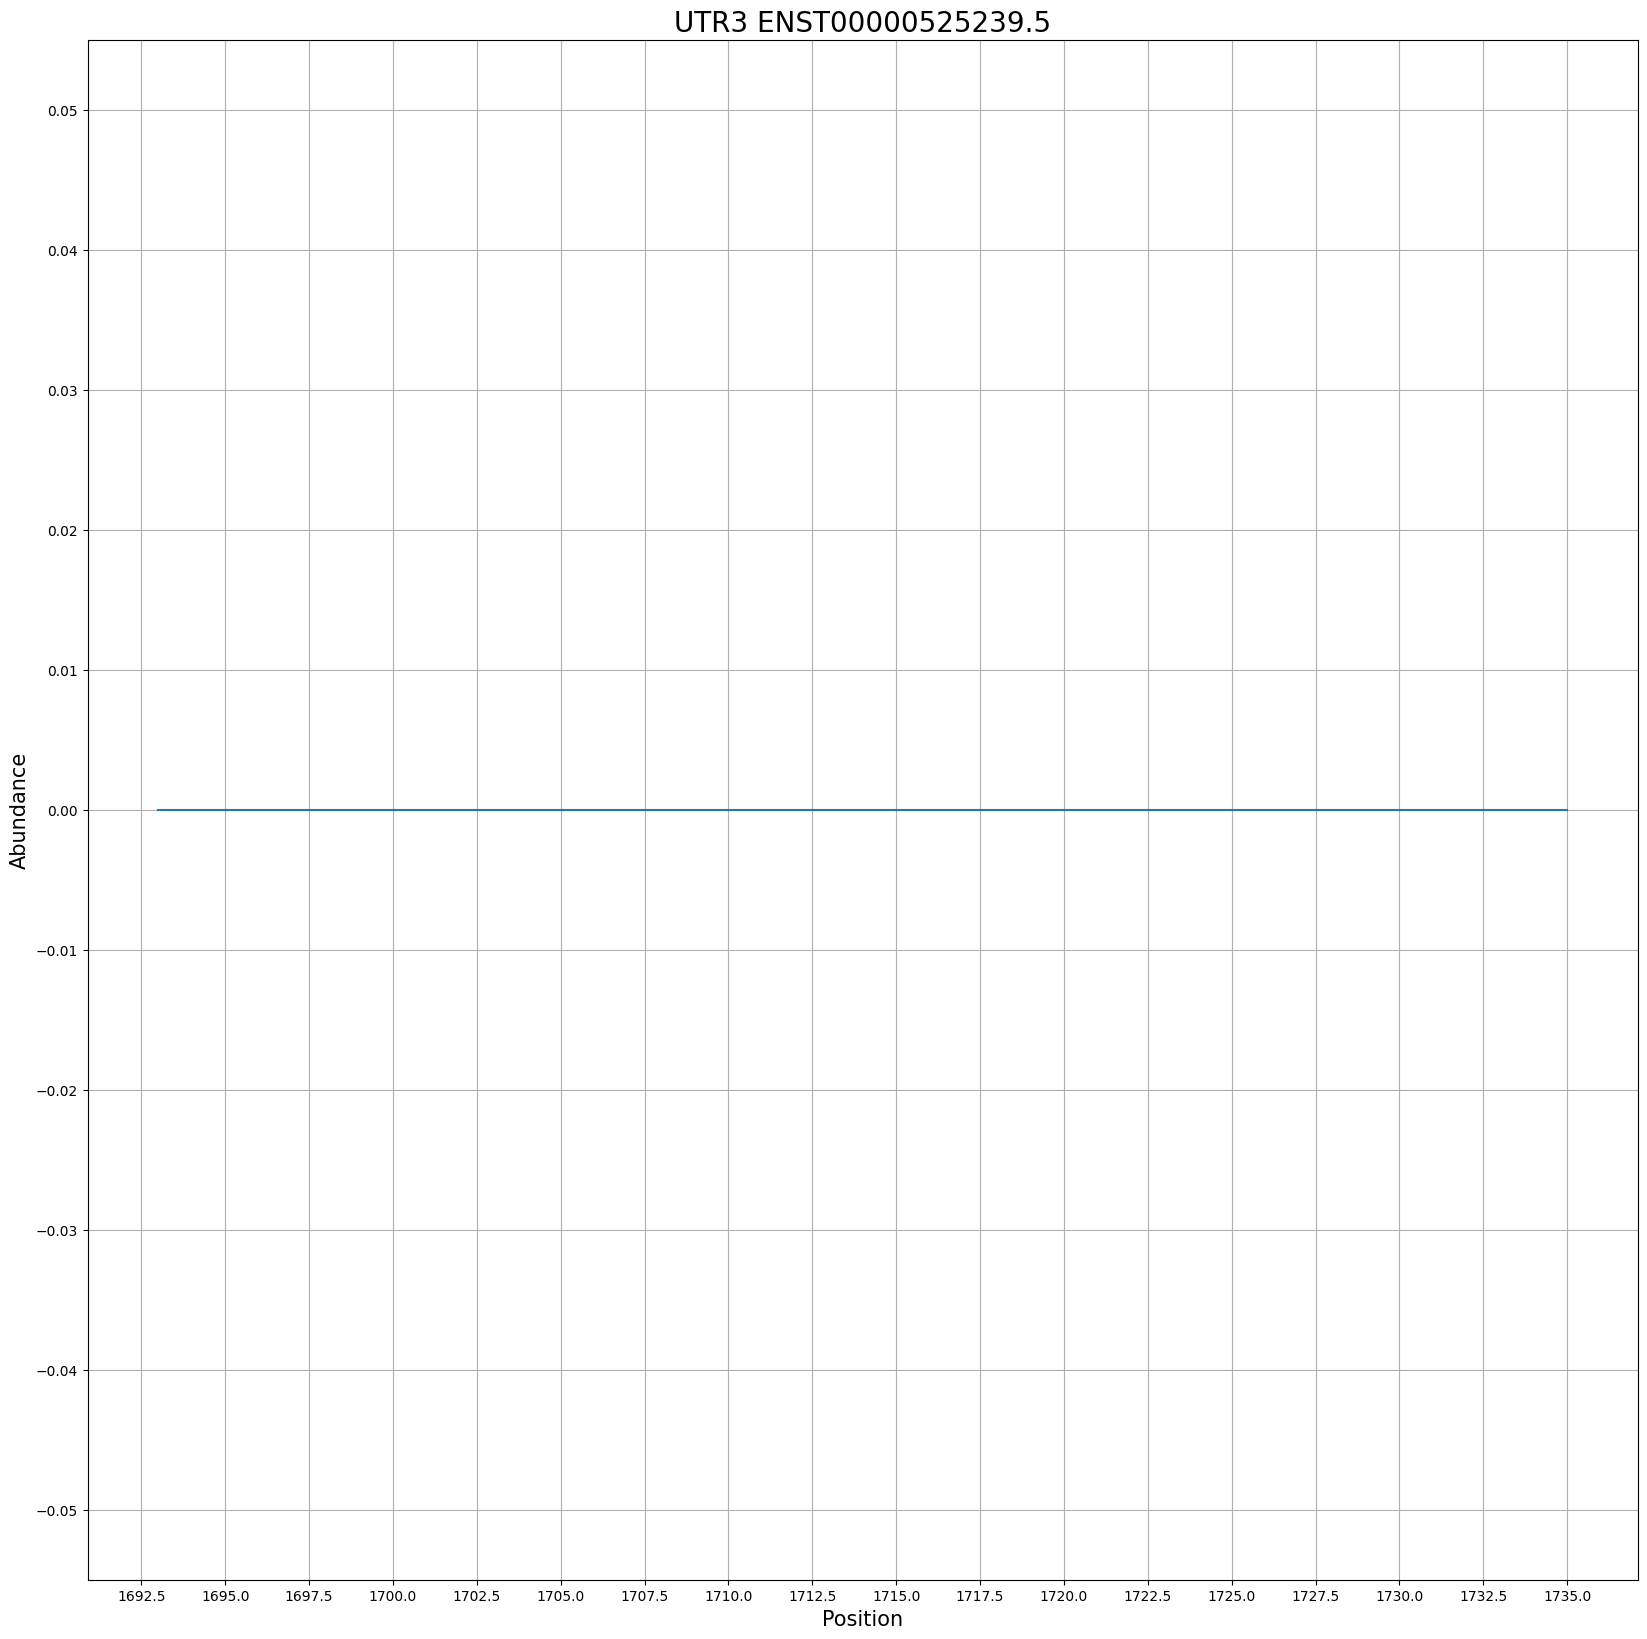

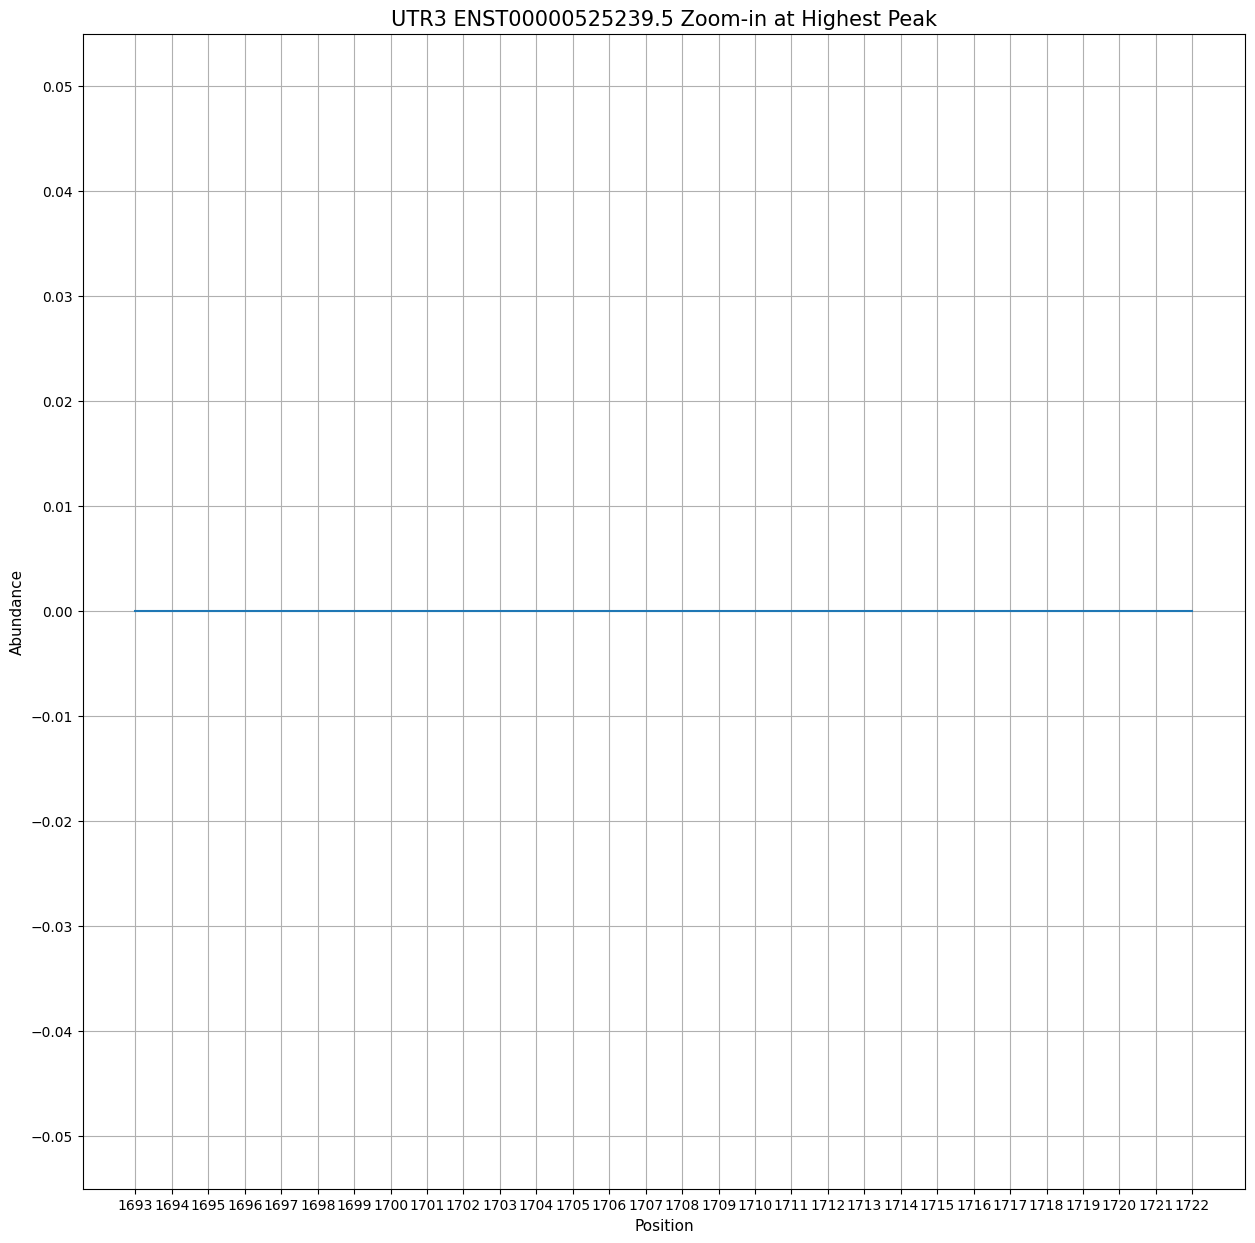

Peaks:
Position: 1, Abundance:0
Position: 2, Abundance:0
Position: 3, Abundance:0


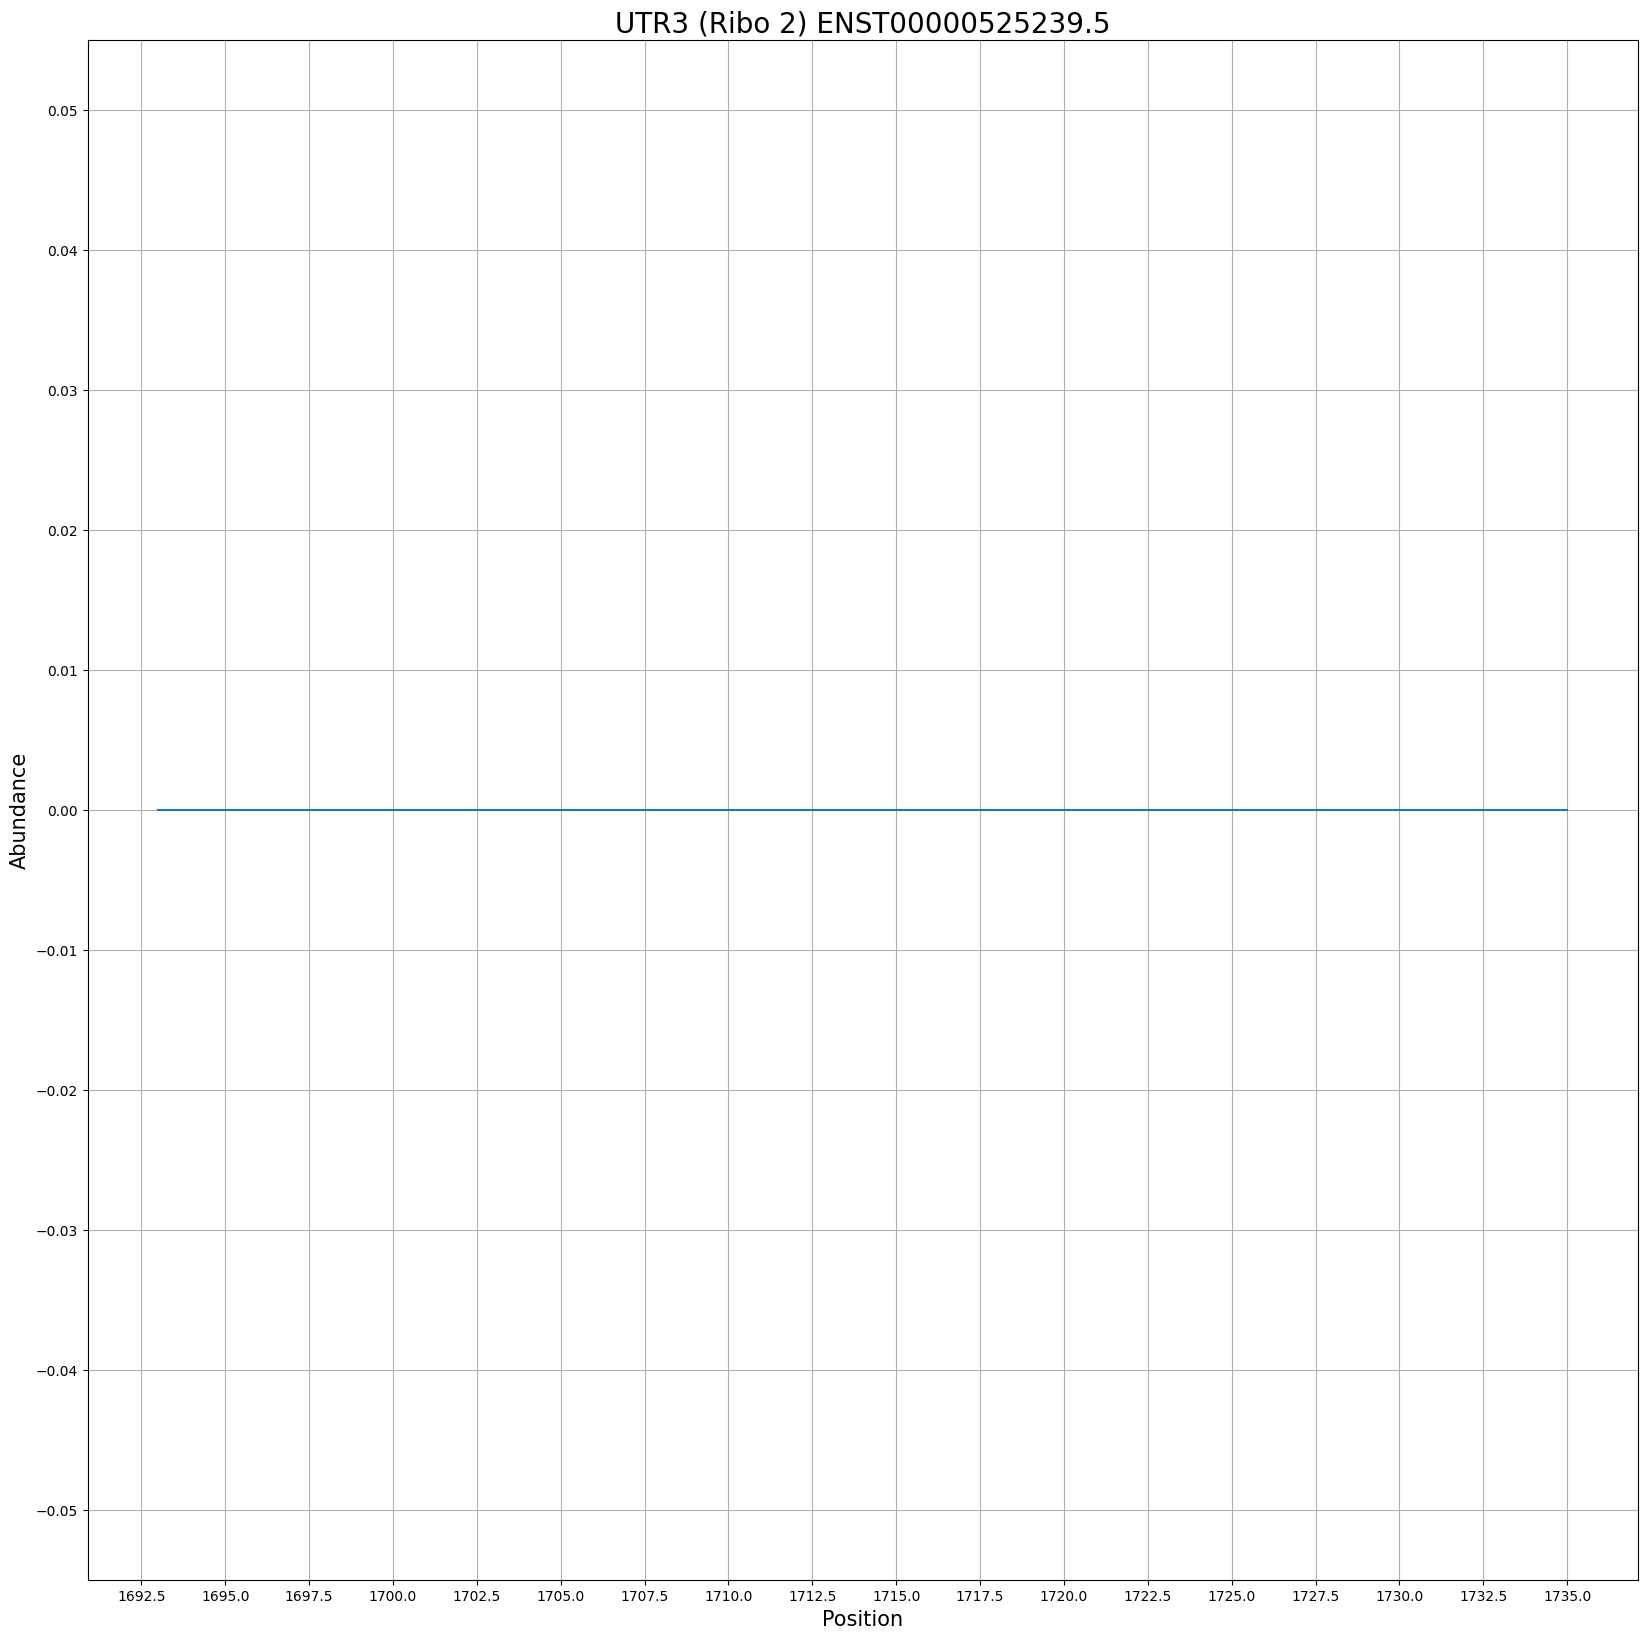

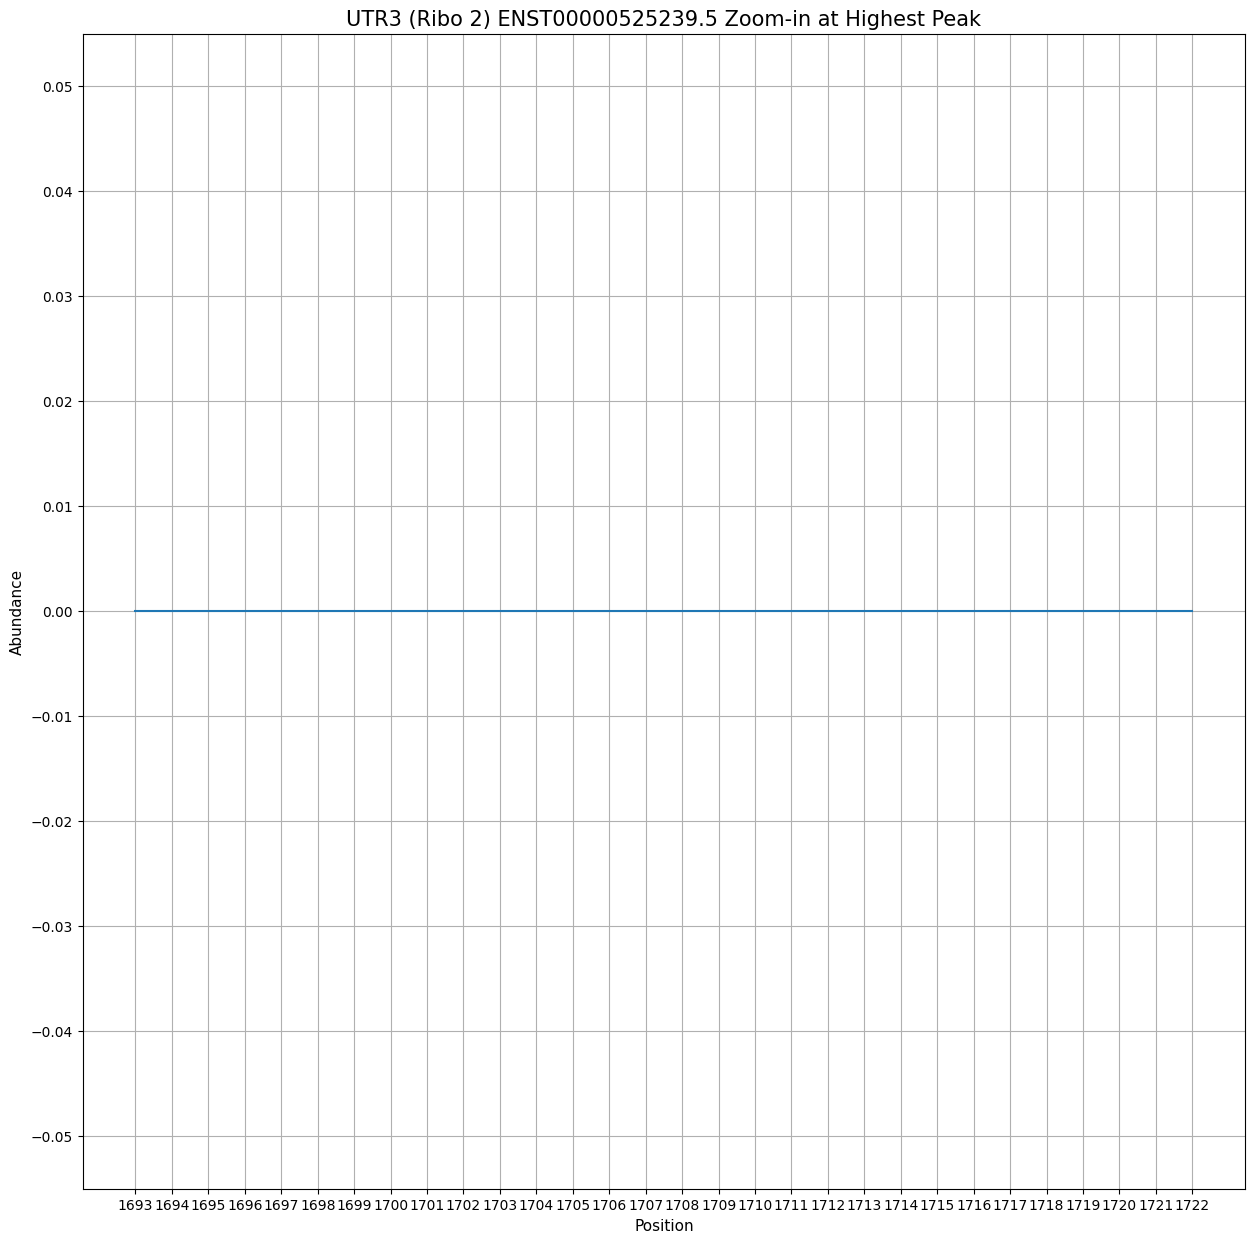

Peaks:
Position: 92, Abundance:12616
Position: 88, Abundance:7328
Position: 90, Abundance:6947


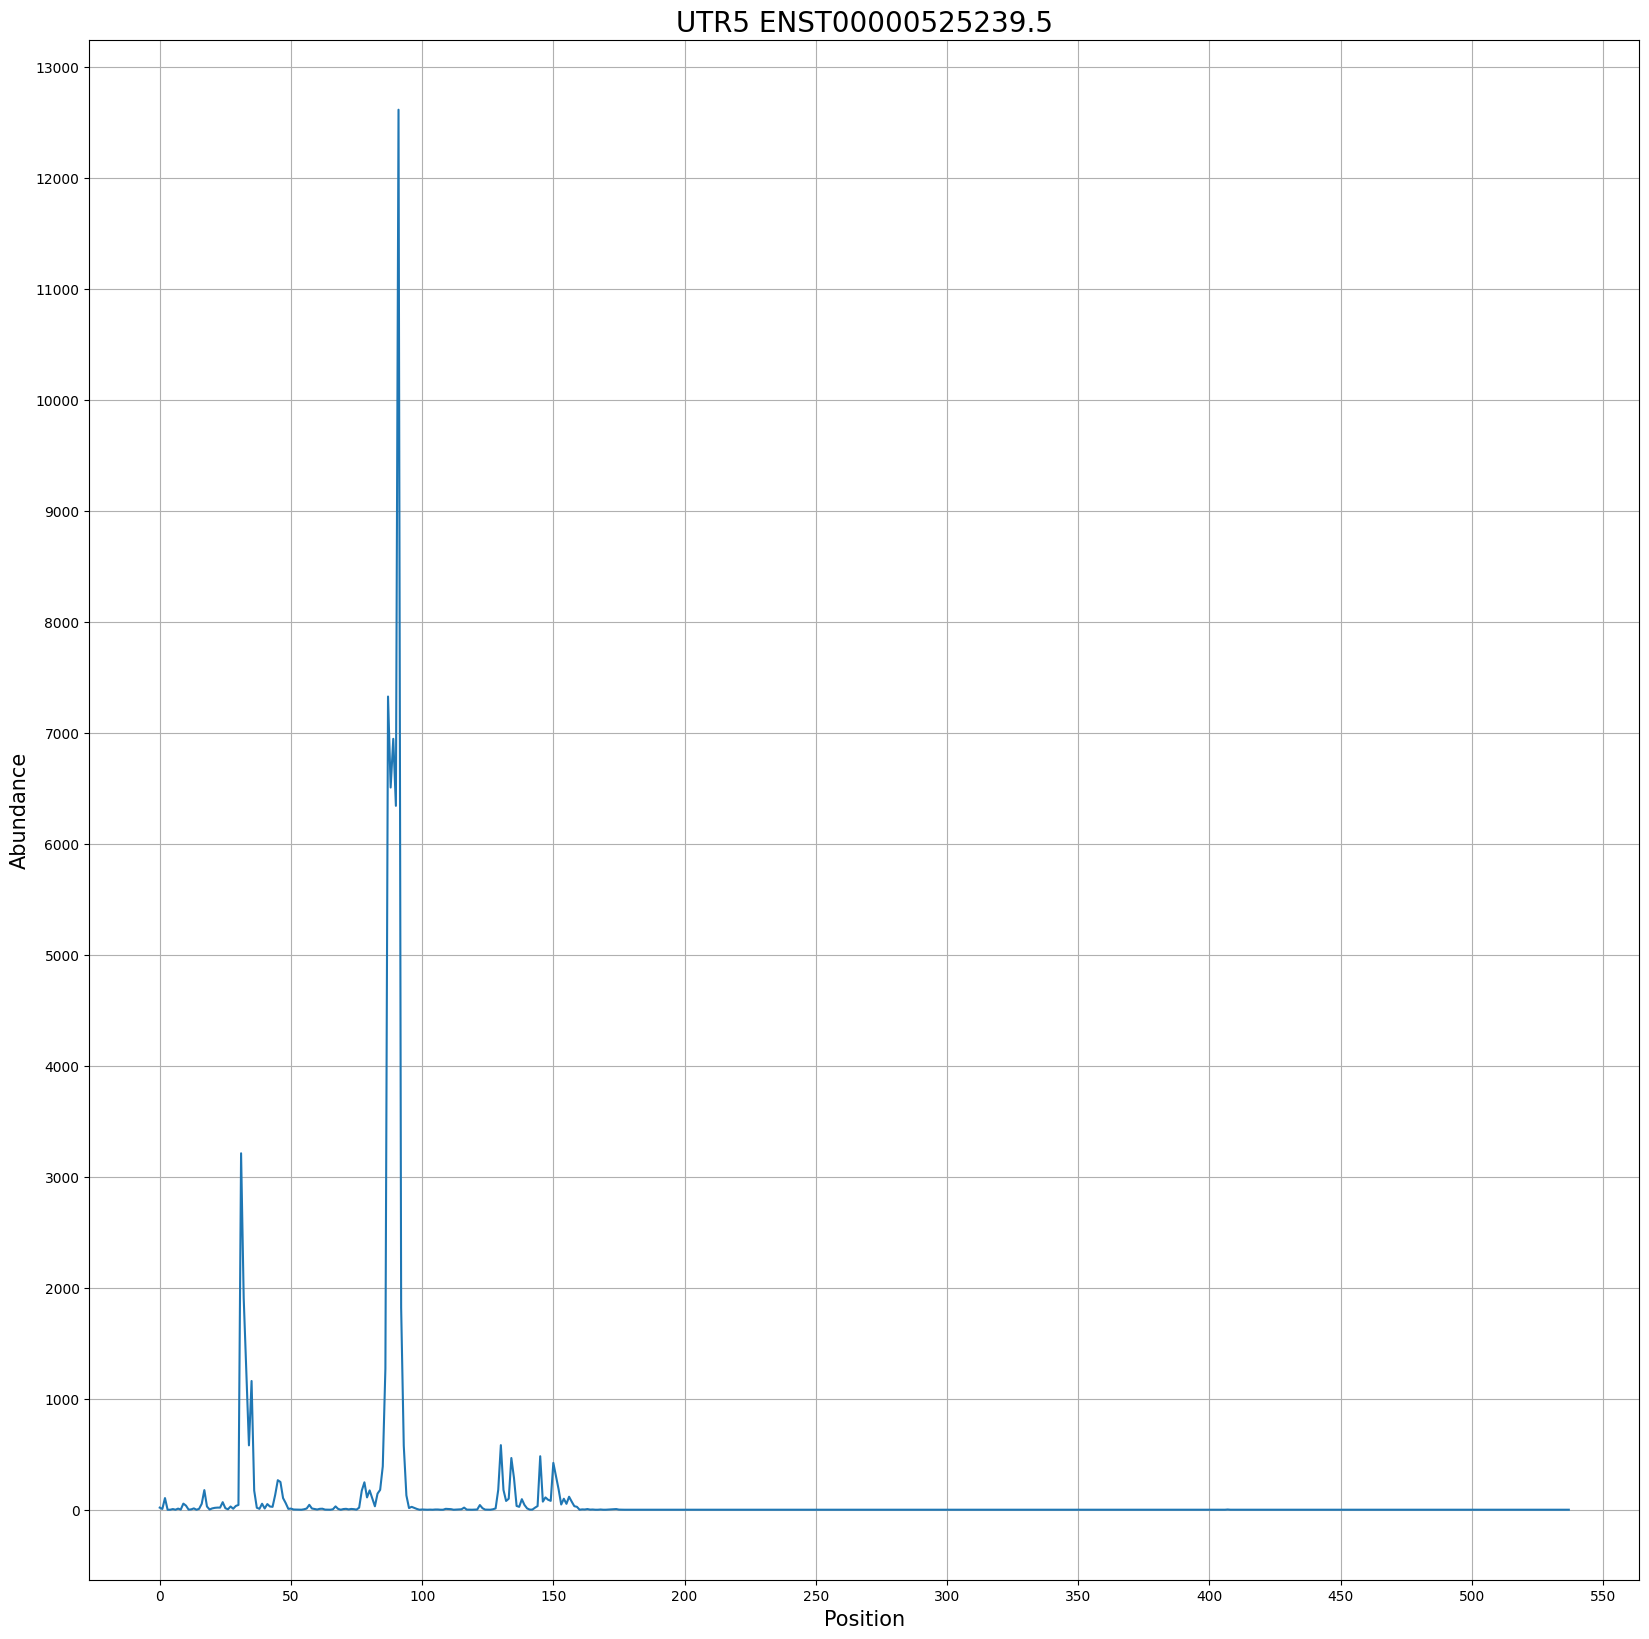

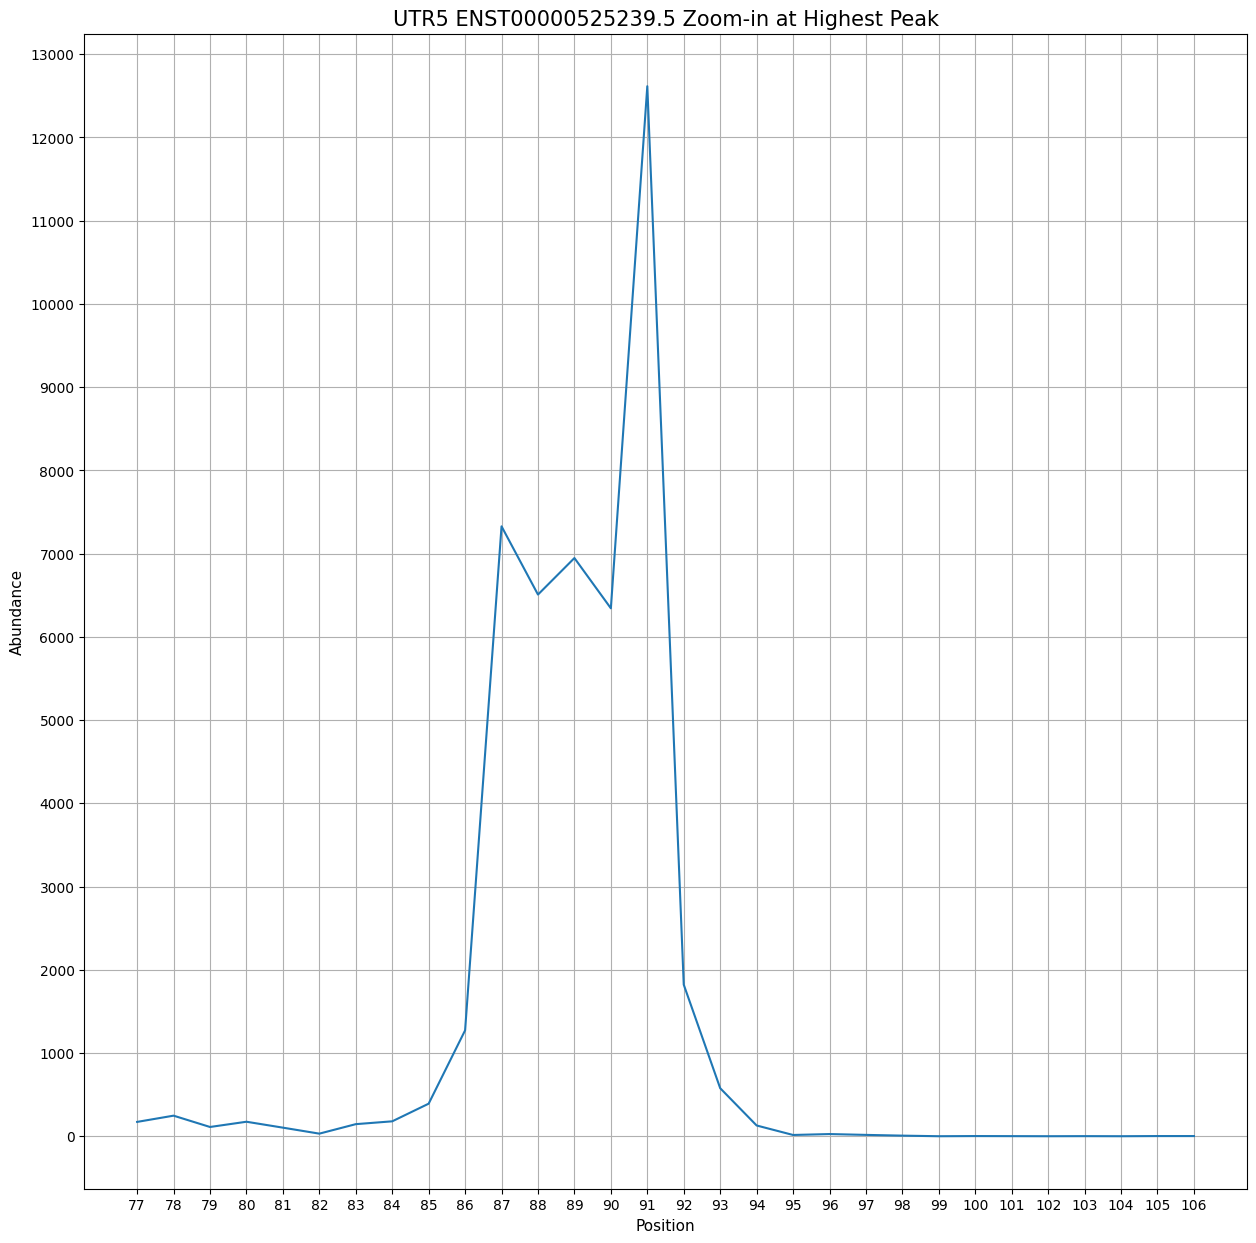

Peaks:
Position: 3, Abundance:5
Position: 10, Abundance:5
Position: 11, Abundance:5


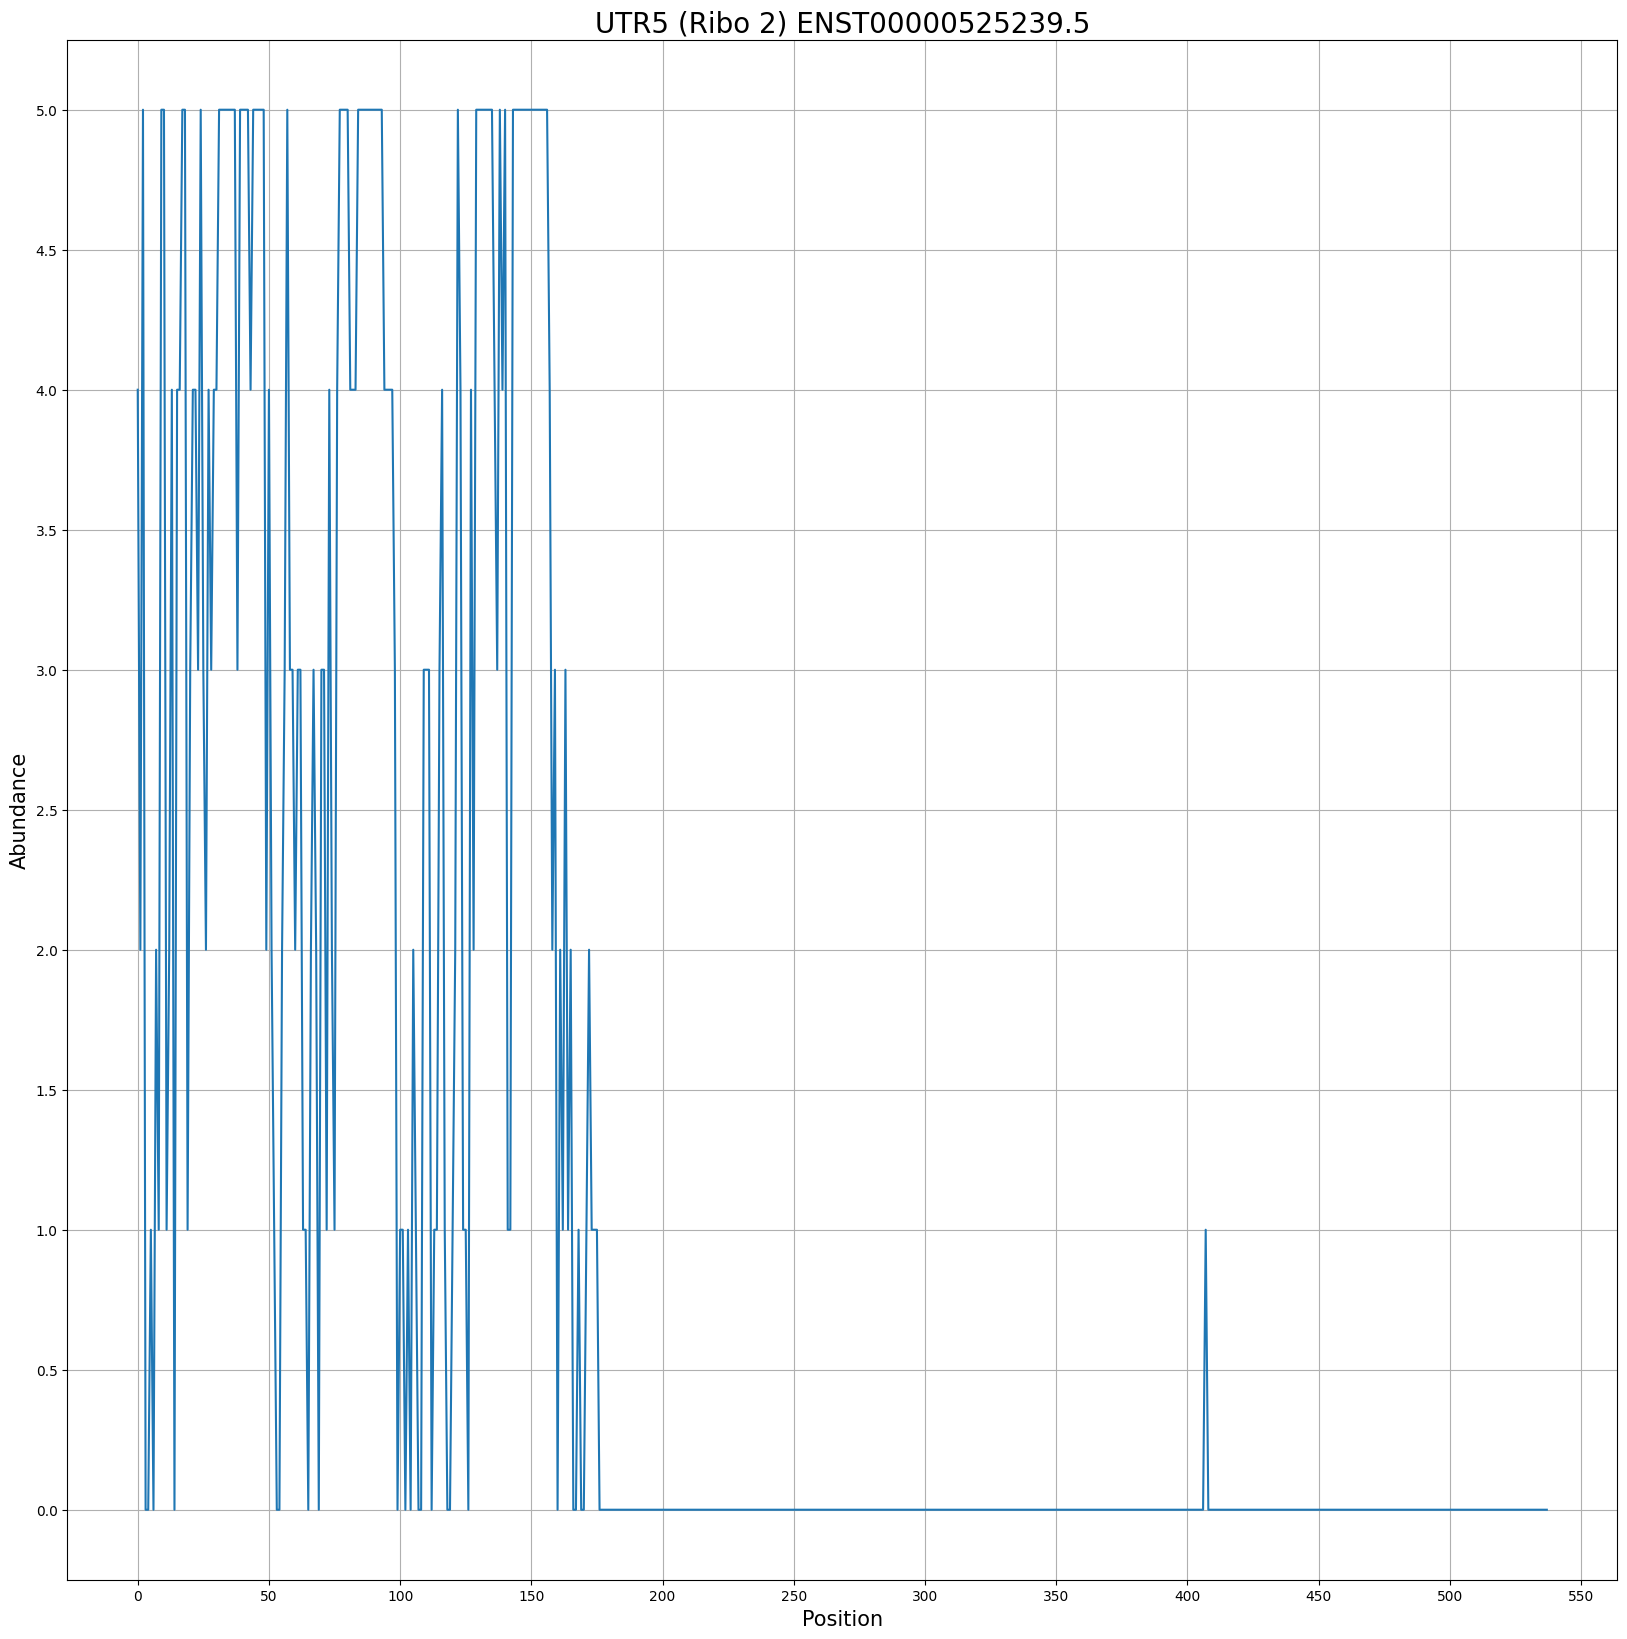

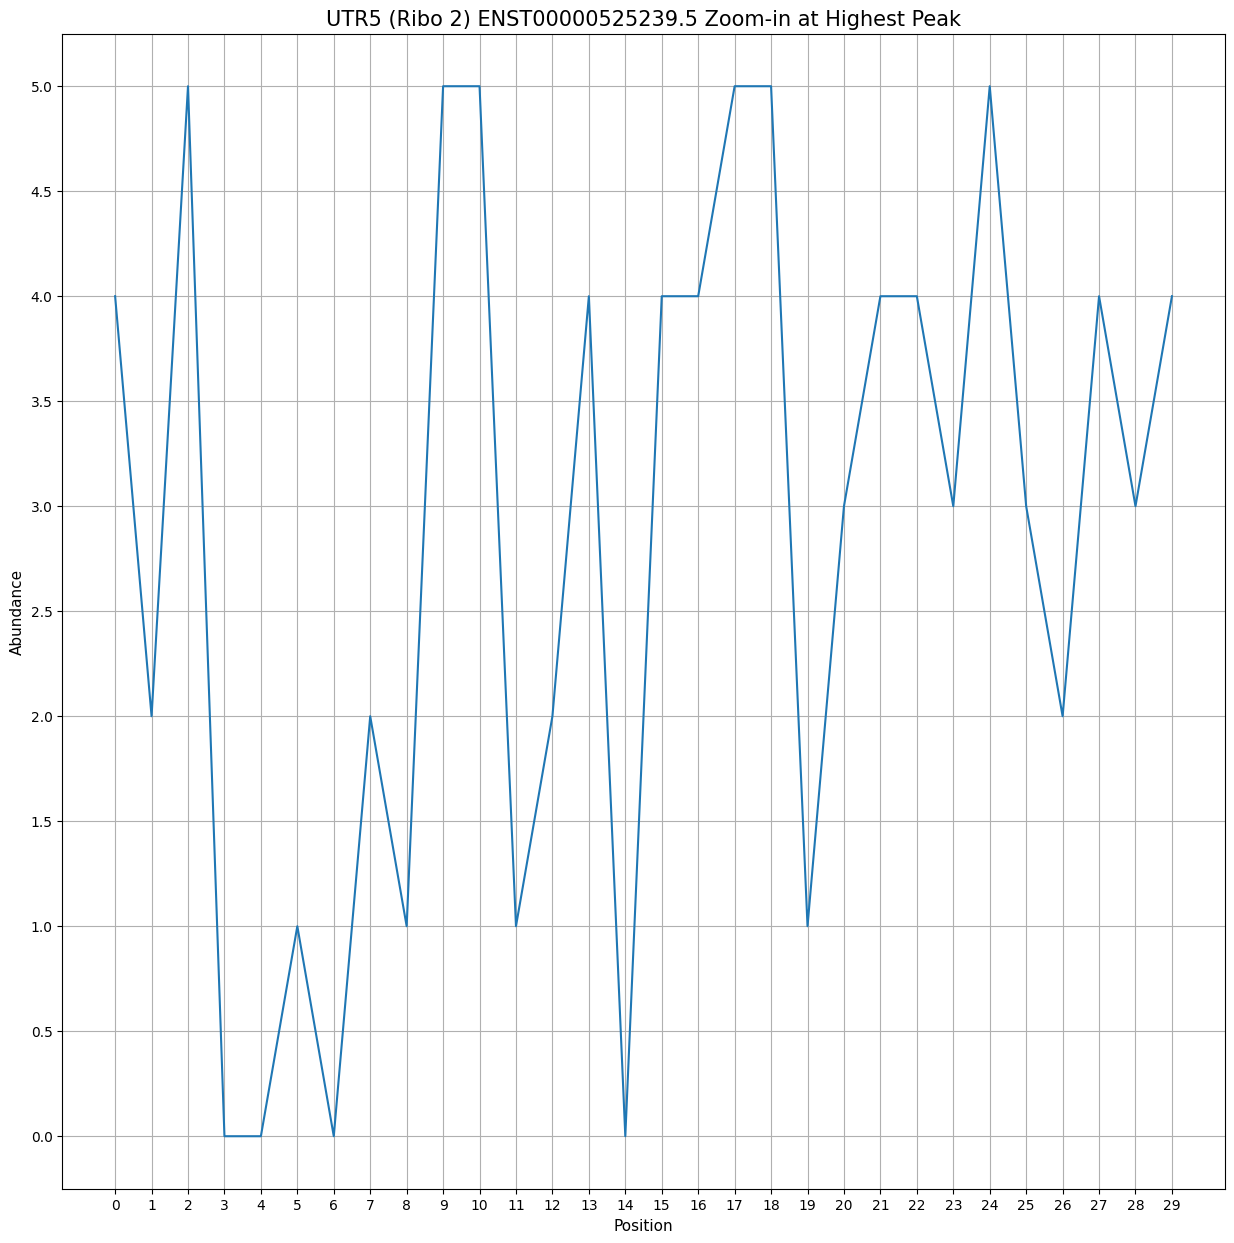

Peaks:
Position: 36, Abundance:7
Position: 468, Abundance:4
Position: 568, Abundance:4


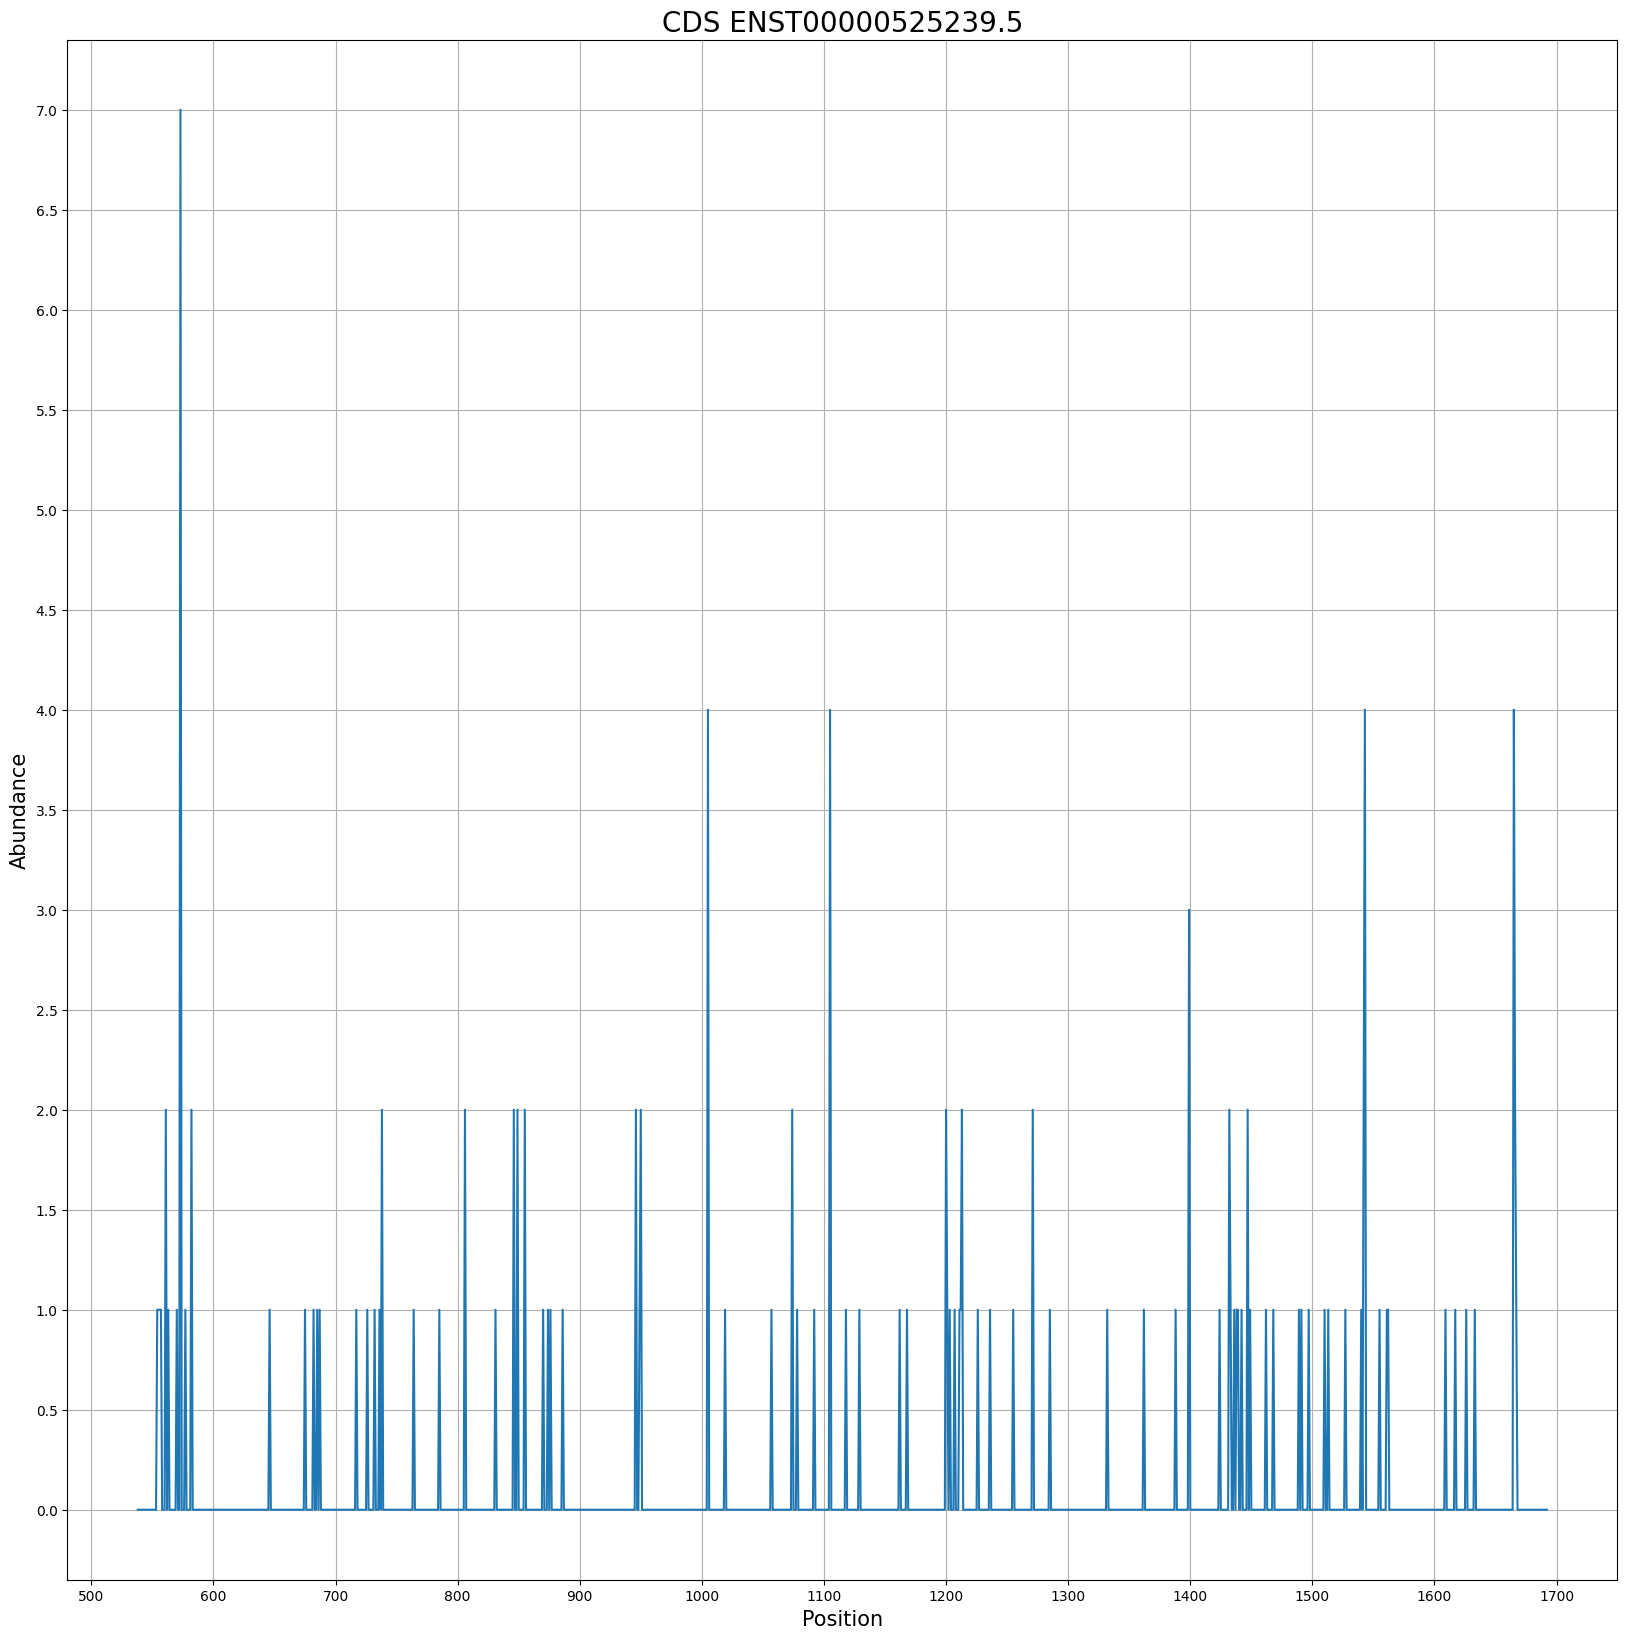

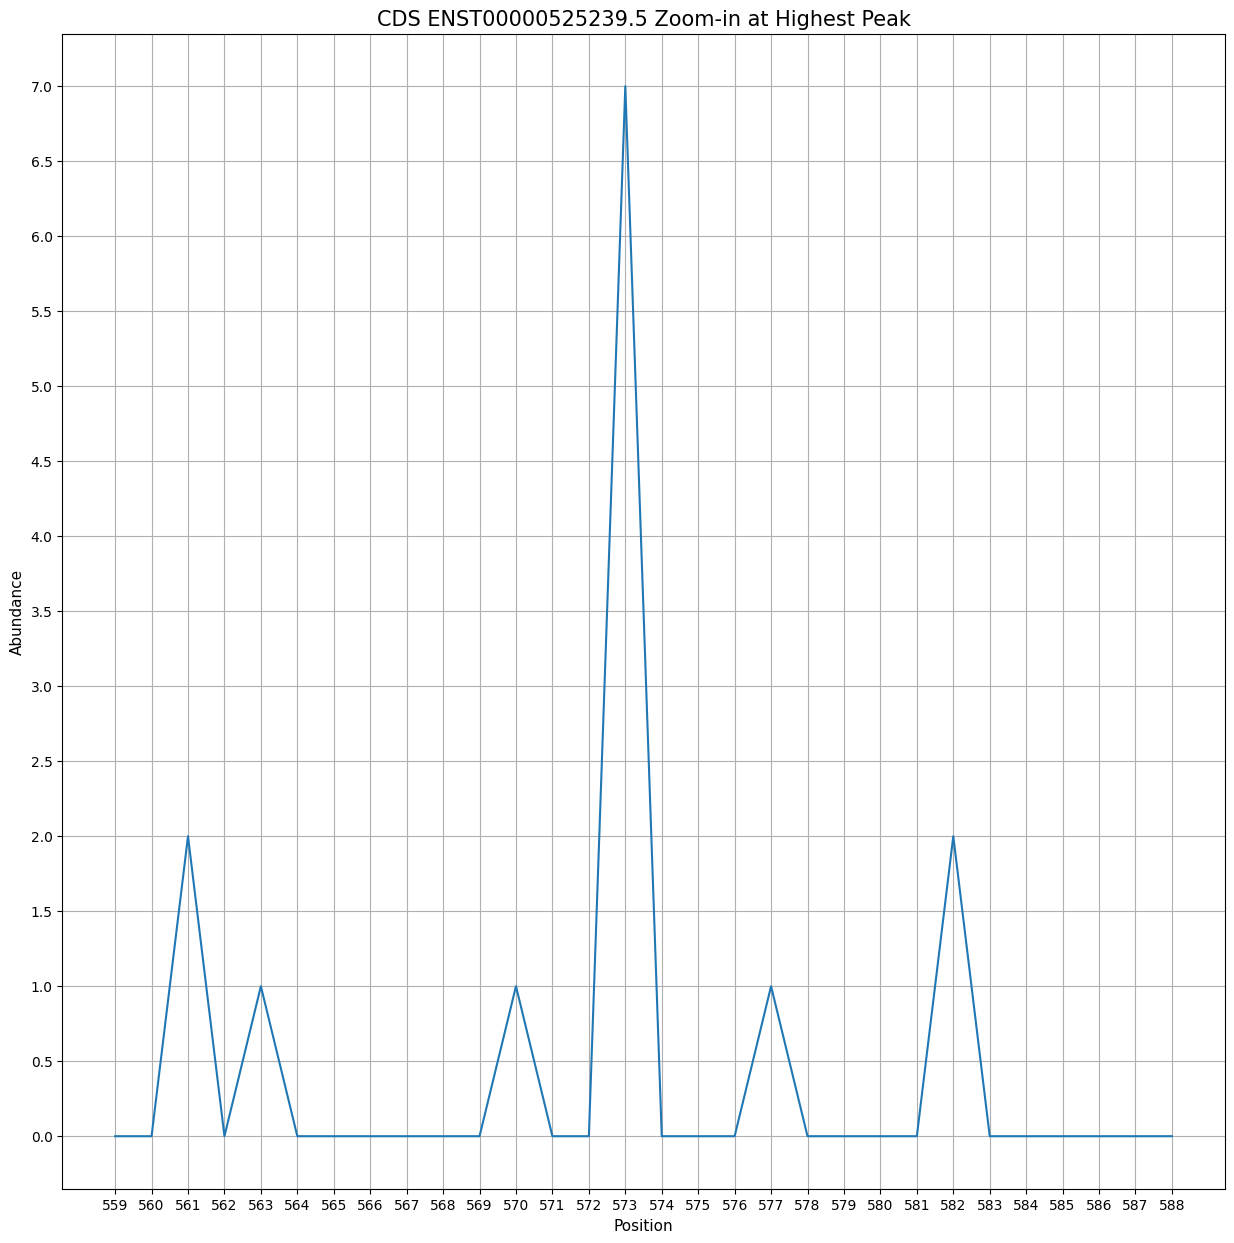

Peaks:
Position: 45, Abundance:2
Position: 201, Abundance:2
Position: 309, Abundance:2


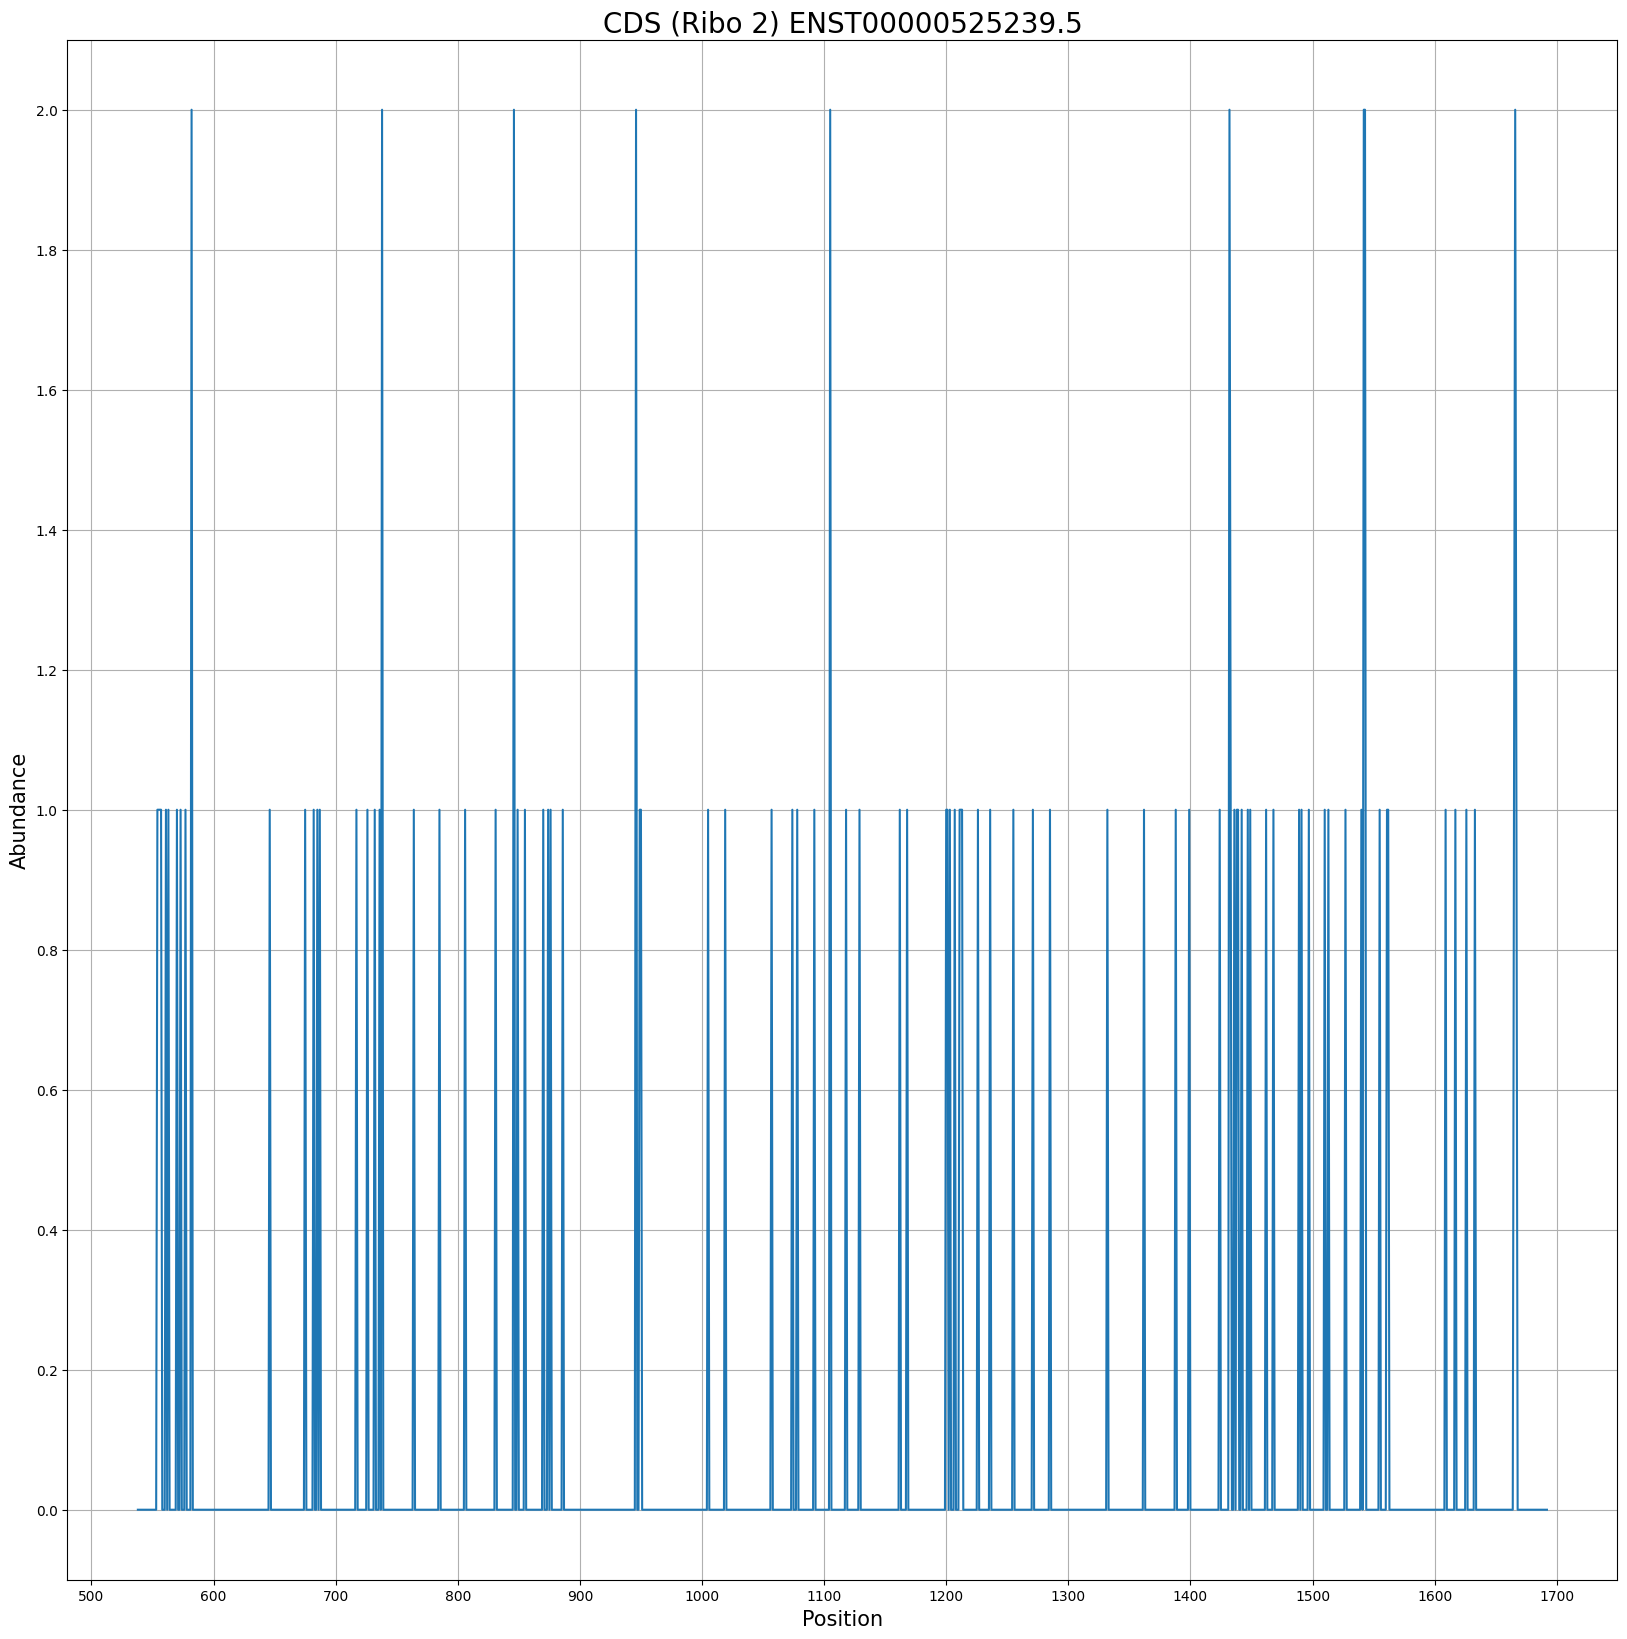

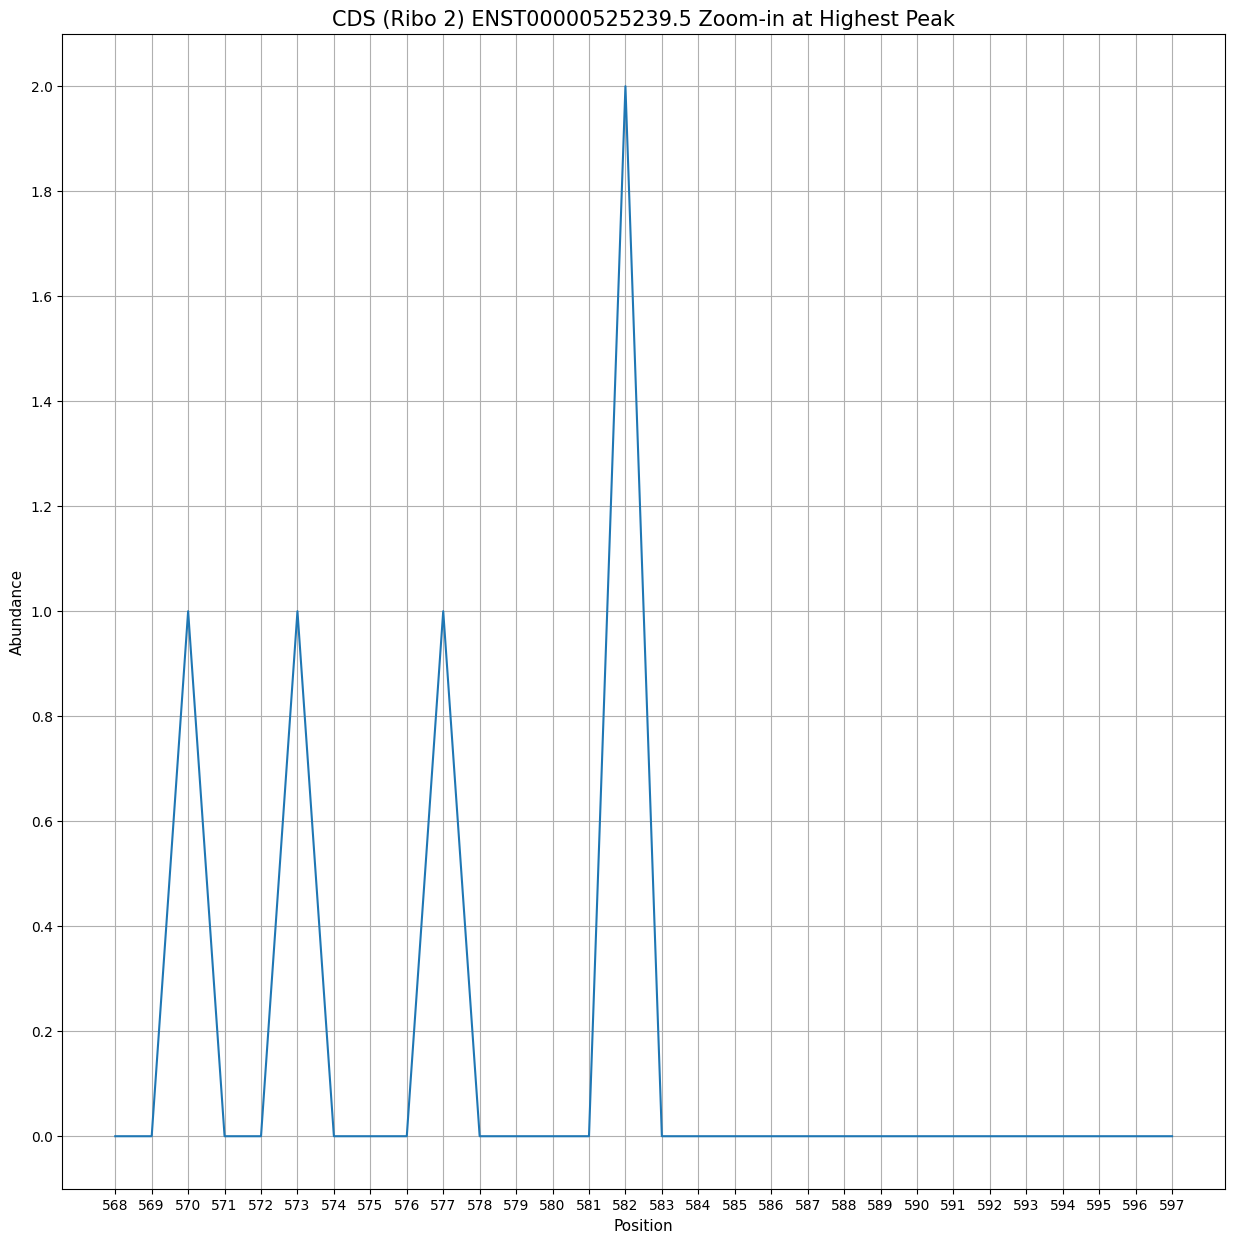

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.1
Creation Time     : 2023-08-02 22:57:26
Reference         : nondeduped_profile
Min Read Length   : 21
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name           Reads  Coverage  RNA-Seq  Metadata
GSM4798525   9062860         *                   
GSM4798526  18963692         *                   
GSM4798527  12337701         *                   

------------------------------------------------------------

Second Ribo File:

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.1
Creation Time     : 2023-08-31 11:11:52
Reference         : umi_deduped_profile
Min Read Length   : 21
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Library:
-------- 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM4798525  8186743                             

------------------

ExperimentDoesntExist: The experiment GSM4798525 doesn't have coverage data

In [3]:
####EXAMPLE_USAGE####

# ND = "/home/yzhong/umi_research/riboflow-082ff926b9ca6ff1ddb596aa9ea53fc3b24e51a9/output/ribo/all.ribo"
# PCR = "/home/yzhong/umi_research/riboflow/output/ribo/all.ribo"
# UMI = "/home/yzhong/umi_research/riboflow/output_umi/ribo/all.ribo"

# TRANSCRIPTS = ["ENST00000525239.5|ENSG00000133316.15|OTTHUMG00000167695.4|OTTHUMT00000395678.1|WDR74-204|WDR74|1736|protein_coding|"]

# annotations = "/home/yzhong/umi_research/riboflow/references_for_riboflow/transcriptome/human/v1/riboflow_annot_and_ref/appris_human_v1_actual_regions.bed"
# ribo_commands(ND, ribofile2 = PCR, minlength = 28, maxlength = 32, lengthdist=False, regioncounts = False, metagene=False, 
#               comparetranscriptcounts=False, experiments = ["GSM4798525"], experiments2 = ["GSM4798525"], transcripts = TRANSCRIPTS, regions = ["CDS"],
#               individualtranscript = True, transcriptregions = ["UTR3", "UTR5", "CDS"], annotations = annotations)
# ribo_commands(ND, ribofile2 = UMI, minlength = 28, maxlength = 32, lengthdist=False, regioncounts = False, metagene=False, 
#               comparetranscriptcounts=False, experiments = ["GSM4798525"], experiments2 = ["GSM4798525"], transcripts = TRANSCRIPTS, regions = ["CDS"],
#               individualtranscript = True, transcriptregions = ["UTR3", "UTR5", "CDS"], annotations = annotations)
# ribo_commands(PCR, ribofile2 = UMI, minlength = 28, maxlength = 32, lengthdist=False, regioncounts = False, metagene=False, 
#               comparetranscriptcounts=False, experiments = ["GSM4798525"], experiments2 = ["GSM4798525"], transcripts = TRANSCRIPTS, regions = ["CDS"],
#               individualtranscript = True, transcriptregions = ["UTR3", "UTR5", "CDS"], annotations = annotations)


